<a href="https://colab.research.google.com/github/akumarpandey686/brain_tumor_classification/blob/master/Brain_tumor_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!pip install -q keras

In [0]:
import keras

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/data/TRAIN'
valid_path = '/content/drive/My Drive/Colab Notebooks/data/TEST'

In [0]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [0]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/Colab Notebooks/data/TRAIN/*')

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [89]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [93]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 177 images belonging to 2 classes.


In [94]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/data/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 38 images belonging to 2 classes.


In [95]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
6/6 [==============================] - 4s 693ms/step - loss: 1.0192 - acc: 0.5824 - val_loss: 0.9327 - val_acc: 0.6579
Epoch 2/5
6/6 [==============================] - 3s 519ms/step - loss: 0.5945 - acc: 0.7391 - val_loss: 1.0544 - val_acc: 0.5000
Epoch 3/5
6/6 [==============================] - 3s 550ms/step - loss: 0.6653 - acc: 0.7220 - val_loss: 1.0254 - val_acc: 0.7105
Epoch 4/5
6/6 [==============================] - 3s 554ms/step - loss: 0.4306 - acc: 0.8103 - val_loss: 0.6466 - val_acc: 0.7632
Epoch 5/5
6/6 [==============================] - 3s 558ms/step - loss: 0.3699 - acc: 0.8643 - val_loss: 0.5910 - val_acc: 0.7895


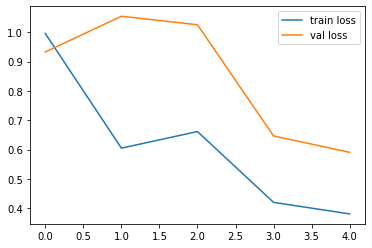

<Figure size 432x288 with 0 Axes>

In [96]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

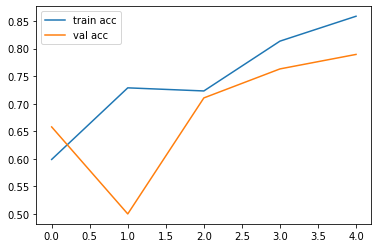

<Figure size 432x288 with 0 Axes>

In [97]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
import tensorflow as tf

In [0]:
from keras.models import load_model

In [0]:
model.save('model_vgg19.h5')